In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.losses import CategoricalCrossentropy # type: ignore

In [2]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

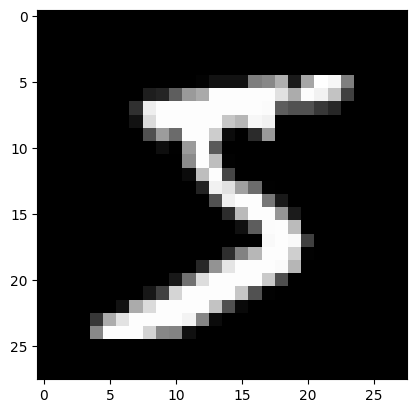

In [3]:
x_train = x_train /255
x_test = x_test /255
plt.imshow(x_train[0], cmap='gray')

In [4]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
x_train.shape

(60000, 28, 28, 1)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [37]:
model = Sequential()

In [38]:

model.add(Conv2D(16, (3,3),1, activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(units=10, activation='softmax'))



In [39]:
model.compile('adam',
            loss='categorical_crossentropy',
              metrics=['accuracy','precision', 'recall'])

In [40]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,514 (33.26 KB)

 Trainable params: 8,514 (33.26 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
logdir = 'logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)
x_train.shape

(60000, 28, 28, 1)

In [42]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=200, validation_split=.02, callbacks=[tensorboard_callback])

Epoch 1/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5481 - loss: 1.3950 - precision: 0.7852 - recall: 0.3454 - val_accuracy: 0.9383 - val_loss: 0.2588 - val_precision: 0.9540 - val_recall: 0.9167
Epoch 2/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9138 - loss: 0.2808 - precision: 0.9350 - recall: 0.8958 - val_accuracy: 0.9550 - val_loss: 0.2088 - val_precision: 0.9668 - val_recall: 0.9458
Epoch 3/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9366 - loss: 0.2081 - precision: 0.9491 - recall: 0.9252 - val_accuracy: 0.9642 - val_loss: 0.1639 - val_precision: 0.9770 - val_recall: 0.9558
Epoch 4/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9499 - loss: 0.1673 - precision: 0.9595 - recall: 0.9419 - val_accuracy: 0.9650 - val_loss: 0.1428 - val_precision: 0.9730 - val_recall: 0.9600
Epoch 5/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9548 - loss: 0.1488 - precision: 0.9632 - recall: 0.9478 - val_accuracy: 0.9700 - val_loss: 0.

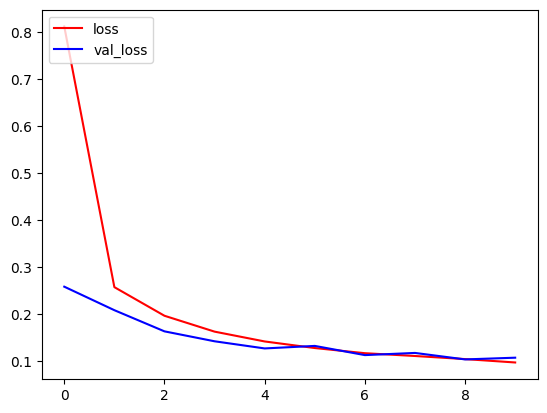

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color ='red', label = 'loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
plt.legend(loc="upper left")
plt.show()

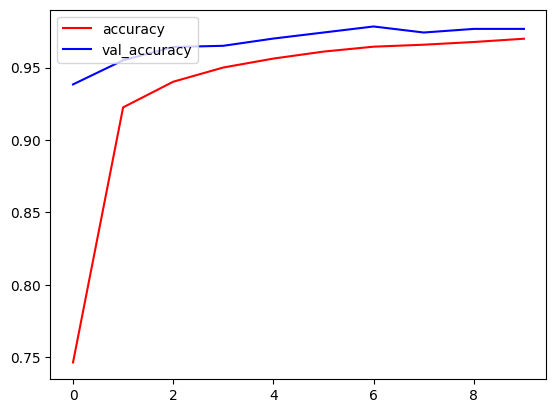

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color="red", label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
plt.legend(loc="upper left")
plt.show()

In [46]:
acc = model.evaluate(x_test, y_test)
print(f'accuracy: {acc[1]}, Precision: {acc[2]}, Recall: {acc[3]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9657 - loss: 0.1075 - precision: 0.9716 - recall: 0.9615
accuracy: 0.9732000231742859, Precision: 0.9776209592819214, Recall: 0.9697999954223633


In [45]:
y_pred = model.predict(x_test)
y_pred = np.array([np.argmax(pred)for pred in y_pred])
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

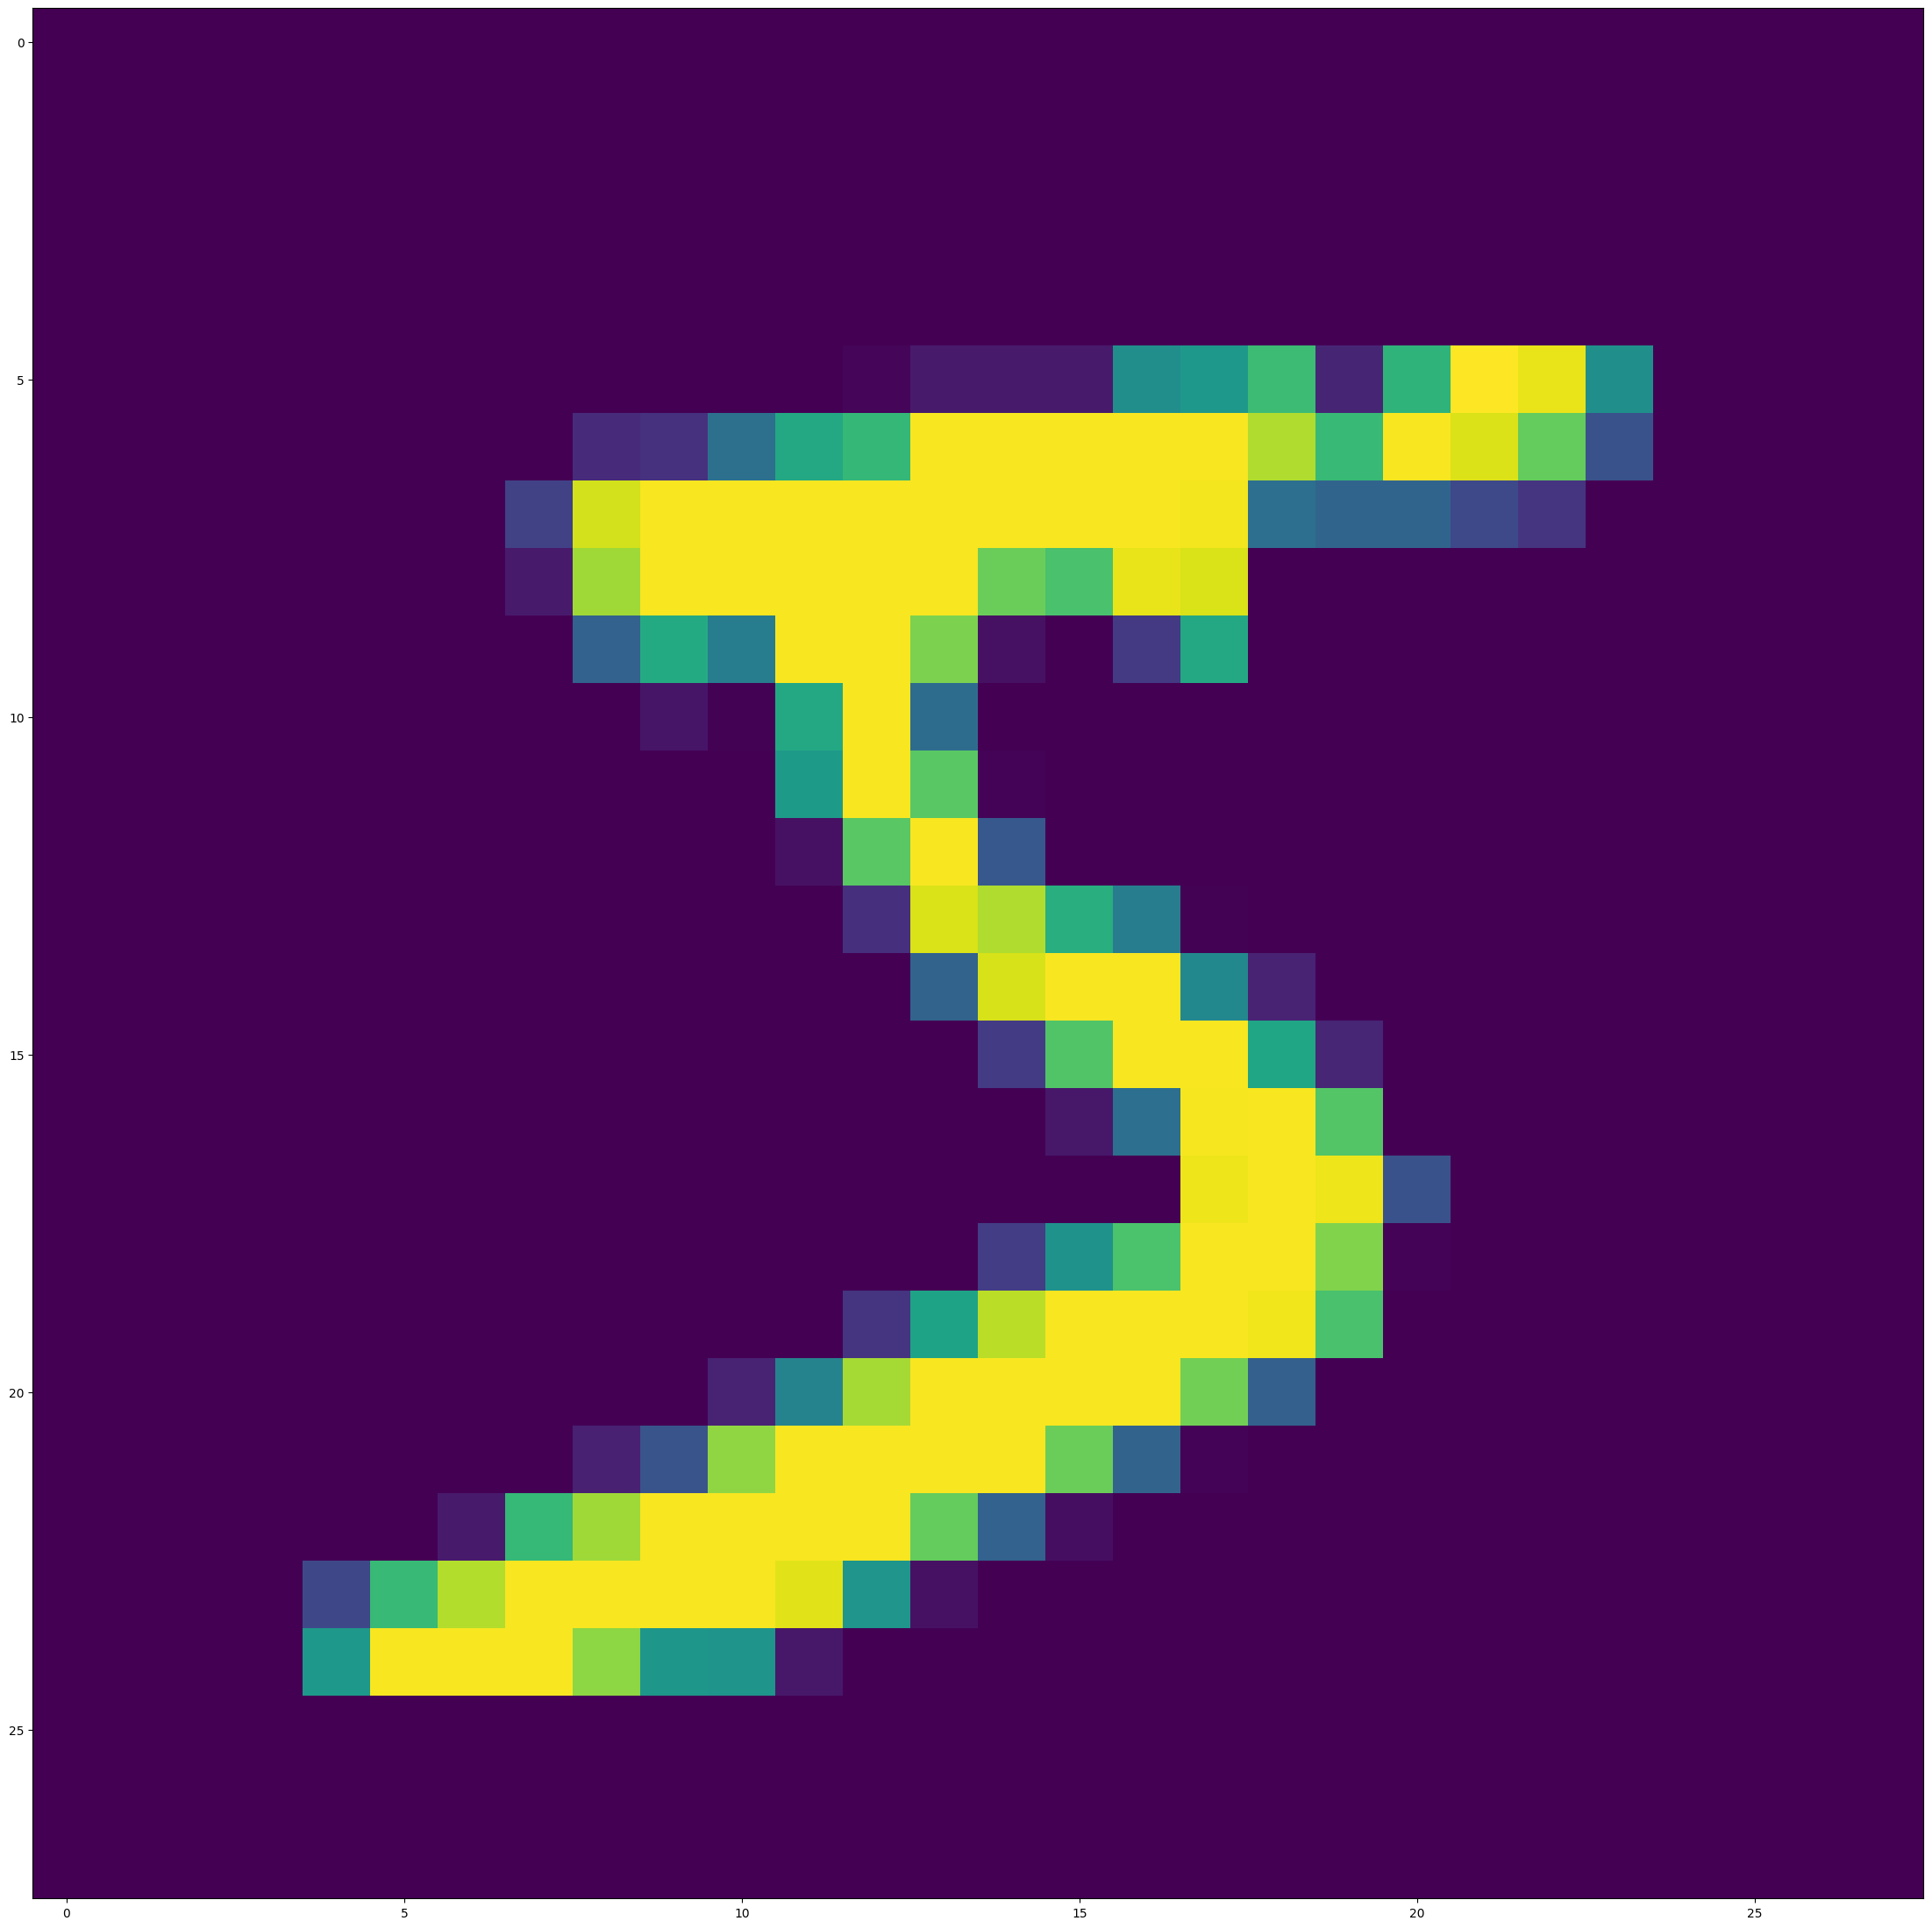

In [10]:
fig = plt.figure(figsize=(28, 28))
plt.imshow(x_train[0])
plt.show()

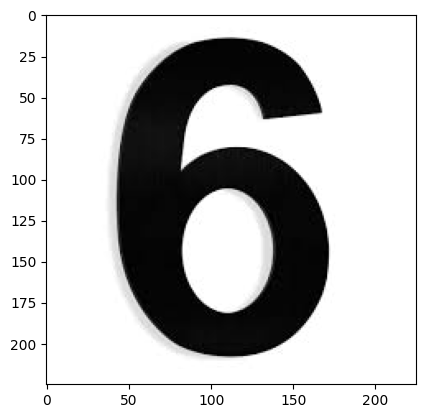

In [10]:
import cv2

file = r'C:\Users\cgrec\OneDrive\Desktop\Digit Classifier\download.jpg'
text_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
plt.imshow(text_image, cmap='gray')

(28, 28)

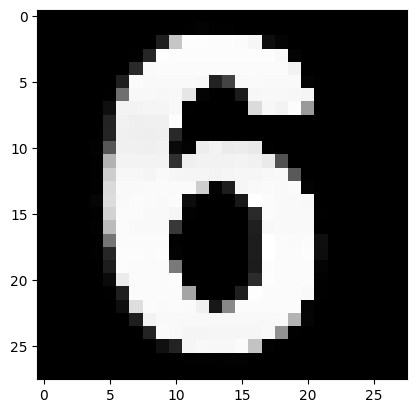

In [11]:
#format image
img_resized = cv2.resize(text_image, (28,28), interpolation=cv2.INTER_LINEAR)
#make the image have a black background
img_resized = cv2.bitwise_not(img_resized)
plt.imshow(img_resized,cmap='gray')
img_resized.shape

In [49]:
img_reshape = np.expand_dims(img_resized/255,2)
img_reshape = np.expand_dims(img_reshape,0)
img_reshape.shape
y_pred = model.predict(img_reshape)
y_pred = np.argmax(y_pred, axis=1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([0], dtype=int64)

In [8]:
from tensorflow.keras.models import load_model
import os as os

In [50]:
model.save(os.path.join('models','idgitclassifiermodeltest.h5'))


In [9]:
#Reload the model
model = load_model(os.path.join('models','idgitclassifiermodel.h5'))
